In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import matplotlib.pyplot as plt

In [3]:
names = ["userid","time","bank_id","pre_amount_of_bill","pre_repayment","credit_amount",\
         "amount_of_bill_left","least_repayment","consume_amount","amount_of_bill","adjust_amount",\
         "circ_interest","avail_amount","prepare_amount","repayment_state"]

bill_train = pd.read_csv("../../pcredit/train/bill_detail_train.txt",header=None)
bill_test = pd.read_csv("../../pcredit/test/bill_detail_test.txt",header=None)

bill_data = pd.concat([bill_train,bill_test])
bill_data.columns=names
bill_data.head()

,userid,time,bank_id,pre_amount_of_bill,pre_repayment,credit_amount,amount_of_bill_left,least_repayment,consume_amount,amount_of_bill,adjust_amount,circ_interest,avail_amount,prepare_amount,repayment_state
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [165]:
#  loan_time  放款时间信息loan_time.txt
names = ['userid','loan_time']
loan_time = pd.read_csv("../../pcredit/train/loan_time_train.txt",header=None)
loan_time.columns=names
loan_time.head()

,userid,loan_time
0,1,5914855887
1,2,5914855887
2,3,5914855887
3,4,5914855887
4,5,5914855887


In [166]:
loan_time[loan_time['userid']==3150]

,userid,loan_time
3149,3150,5919867087


In [134]:
userid3150 = bill_data[bill_data['userid']==3150]
userid3150.head(10)

,userid,time,bank_id,pre_amount_of_bill,pre_repayment,credit_amount,amount_of_bill_left,least_repayment,consume_amount,amount_of_bill,adjust_amount,circ_interest,avail_amount,prepare_amount,repayment_state
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.000000,0.000000,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.000000,0.000000,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.000000,0.000000,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.000000,0.000000,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.000000,0.000000,0.0,0.0,20.307743,0
5,3150,5906744639,6,19.668245,19.722809,20.664418,19.799044,18.194951,1,0.000000,0.000000,0.0,0.0,19.971271,0
6,3150,5906744682,6,20.106043,20.153592,21.069883,20.242691,18.906474,2,0.000000,0.000000,0.0,0.0,20.376736,0
7,3150,5926181902,11,0.000000,0.000000,0.000000,16.851878,16.207495,0,0.000000,0.000000,0.0,0.0,0.000000,0
8,3150,5926181928,16,19.237914,19.420133,19.460445,-16.292183,14.327077,1,17.322724,0.000000,0.0,0.0,19.460445,0
9,3150,5926182123,14,19.754017,19.355084,21.580708,19.971764,19.420654,0,19.976445,18.659787,0.0,0.0,21.580708,0


In [1]:
''' # groupby 数据
gp = userid3150.groupby('bank_id')
for key,name in gp:
    print key
    print len(name)
'''

"\ngp = userid3150.groupby('bank_id')\nfor key,name in gp:\n    print key\n    print len(name)\n"

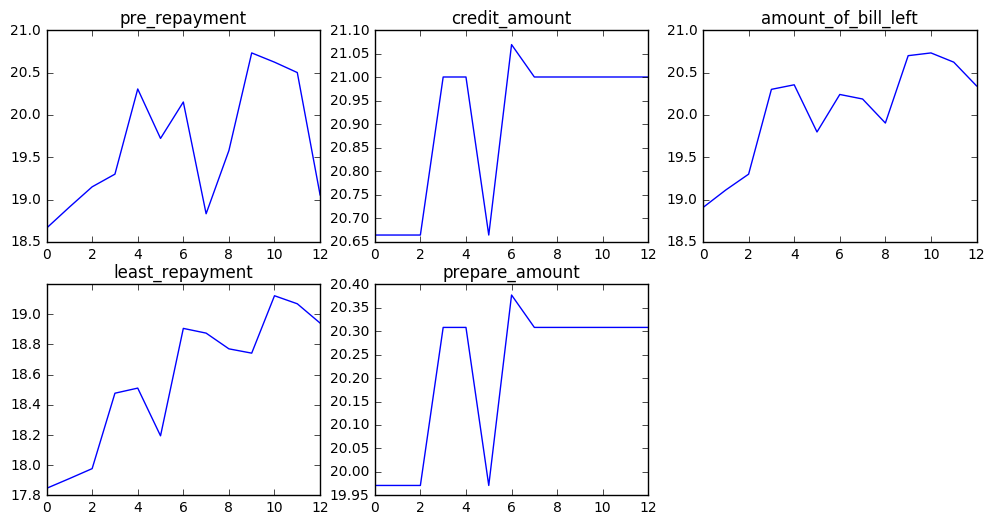

In [196]:
data = userid3150_bank6[['pre_repayment','credit_amount','amount_of_bill_left','least_repayment','prepare_amount']]
data.index = range(len(userid3150_bank6))
plt.figure(figsize=(12,6))
plt.subplot(231)
data['pre_repayment'].plot()
plt.title('pre_repayment')

plt.subplot(232)
data['credit_amount'].plot()
plt.title('credit_amount')

plt.subplot(233)
data['amount_of_bill_left'].plot()
plt.title('amount_of_bill_left')

plt.subplot(234)
data['least_repayment'].plot()
plt.title('least_repayment')

plt.subplot(235)
data['prepare_amount'].plot()
plt.title('prepare_amount')

plt.show()

In [7]:
#  1)获取消费笔数 ,消费笔数从 sum 改成 mean
consume_amount = bill_data[['userid','consume_amount']]
consume_amount = pd.pivot_table(consume_amount,index=['userid'],values=['consume_amount'],aggfunc=np.mean)
consume_amount.head()

,consume_amount
userid,
2,2.521739
3,2.000000
4,0.055556
5,0.000000
6,2.904762


In [4]:
consume_amount_bank = bill_data[['userid','bank_id','consume_amount']]
consume_amount_bank = pd.pivot_table(consume_amount_bank,index=['userid','bank_id'],values=['consume_amount'],aggfunc=np.mean)
consume_amount_bank.head()

consume_amount
userid bank_id                
2      4              1.666667
       9              0.250000
       16             4.200000
3      2              2.000000
4      3              0.142857

In [6]:
consume_amount_bank_max = consume_amount_bank.max(level='userid')
consume_amount_bank_max.columns = ['consume_amount_bank_max']
consume_amount_bank_max.head()

,consume_amount_bank_max
userid,
2,4.200000
3,2.000000
4,0.142857
5,0.000000
6,6.076923


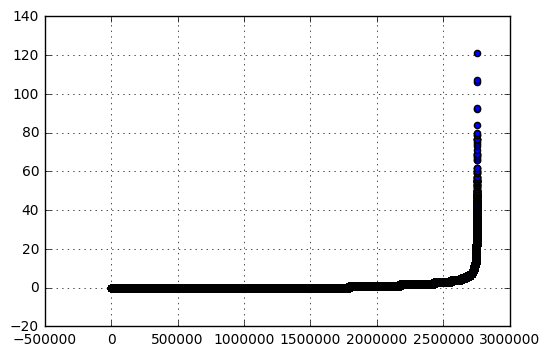

In [160]:
data = bill_data['consume_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

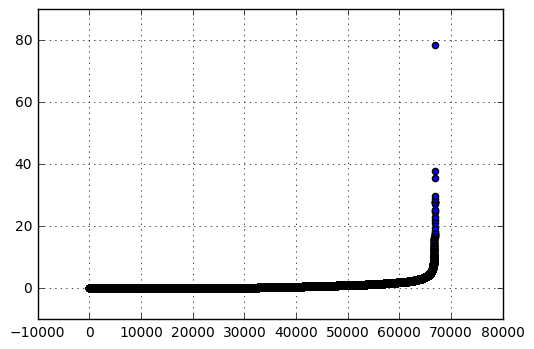

In [158]:
data = consume_amount['consume_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [62]:
def getNum(x):
    if x < 0 : return 0
    if x <= 2000: return 1 + np.round(x*1.0/250)
    return 10
consumeN = DataFrame()
consumeN['consume_amount#0'] = consume_amount['consume_amount'].apply(lambda x:getNum(x))
consumeN.head()

,consume_amount#0
userid,
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [13]:
# 信用卡额度 credit_amount
credit_amount = bill_data[['userid','credit_amount']]
credit_amount = pd.pivot_table(credit_amount,index=['userid'],values=['credit_amount'],aggfunc=np.mean)
credit_amount.head()

,credit_amount
userid,
2,18.638974
3,18.361833
4,16.055204
5,20.664418
6,20.567794


In [15]:
credit_amount_bank_m = bill_data[['userid','bank_id','credit_amount']]
credit_amount_bank_m = pd.pivot_table(credit_amount_bank_m,index=['userid','bank_id'],values=['credit_amount'],aggfunc=np.max)
credit_amount_bank_m.head()

credit_amount
userid bank_id               
2      4            19.971271
       9            19.971271
       16           21.580708
3      2            18.361833
4      3            20.441274

In [8]:
credit_amount_bank = bill_data[['userid','bank_id','credit_amount']]
credit_amount_bank = pd.pivot_table(credit_amount_bank,index=['userid','bank_id'],values=['credit_amount'],aggfunc=np.mean)
credit_amount_bank.head()

credit_amount
userid bank_id               
2      4            19.573962
       9            19.971271
       16           17.264566
3      2            18.361833
4      3            20.441274

In [10]:
# 去所有信用卡额度平均值的最大值
credit_amount_bank_max = credit_amount_bank.max(level='userid')
credit_amount_bank_max.columns = ['credit_amount_bank_max']
credit_amount_bank_max.head()

,credit_amount_bank_max
userid,
2,19.971271
3,18.361833
4,20.441274
5,20.664418
6,21.102763


In [14]:
# 去所有信用卡额度平均值的最小值
credit_amount_bank_min = credit_amount_bank.min(level='userid')
credit_amount_bank_min.columns = ['credit_amount_bank_min']
credit_amount_bank_min.head()

,credit_amount_bank_min
userid,
2,17.264566
3,18.361833
4,2.381873
5,20.664418
6,20.112310


In [5]:
# 信用卡额度最大值
credit_amount_max = bill_data[['userid','credit_amount']]
credit_amount_max = pd.pivot_table(credit_amount_max,index=['userid'],values=['credit_amount'],aggfunc=np.max)
credit_amount_max.columns = ['credit_amount_max']
credit_amount_max.head()

,credit_amount_max
userid,
2,21.580708
3,18.361833
4,20.441274
5,20.664418
6,21.497327


In [6]:
# 信用卡额度最小值
credit_amount_min = bill_data[['userid','credit_amount']]
credit_amount_min = pd.pivot_table(credit_amount_min,index=['userid'],values=['credit_amount'],aggfunc=np.min)
credit_amount_min.columns = ['credit_amount_min']
credit_amount_min.head()

,credit_amount_min
userid,
2,0.000000
3,18.361833
4,0.000000
5,20.664418
6,19.971271


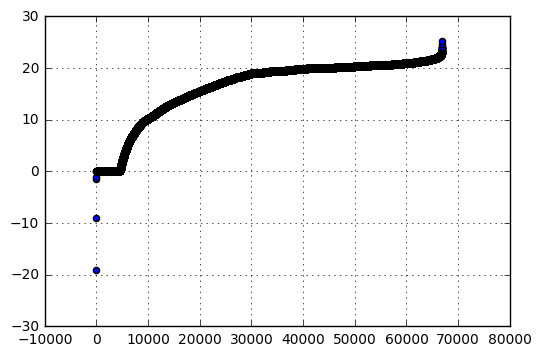

In [16]:
data = credit_amount['credit_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [12]:
#  合并信用卡额度的数据
credit_amount = credit_amount.join([credit_amount_max,credit_amount_min])
credit_amount.head()

NameError: name 'credit_amount' is not defined

In [8]:
credit_amount['credit_amount_sub'] = credit_amount['credit_amount_max']-credit_amount['credit_amount_min']
credit_amount.head()

,credit_amount,credit_amount_max,credit_amount_min,credit_amount_sub
userid,,,,
2,18.638974,21.580708,0.000000,21.580708
3,18.361833,18.361833,18.361833,0.000000
4,16.055204,20.441274,0.000000,20.441274
5,20.664418,20.664418,20.664418,0.000000
6,20.567794,21.497327,19.971271,1.526056


In [16]:
#  可用金额  avail_amount
avail_amount = bill_data[['userid','avail_amount']]
avail_amount = pd.pivot_table(avail_amount,index=['userid'],values=['avail_amount'],aggfunc=np.mean)
avail_amount.head()

,avail_amount
userid,
2,0.000000
3,0.000000
4,1.014342
5,0.000000
6,2.447743


In [10]:
#  可用金额  avail_amount
avail_amount_max = bill_data[['userid','avail_amount']]
avail_amount_max = pd.pivot_table(avail_amount_max,index=['userid'],values=['avail_amount'],aggfunc=np.max)
avail_amount_max.columns = ['avail_amount_max']
avail_amount_max.head()

,avail_amount_max
userid,
2,0.000000
3,0.000000
4,19.662141
5,0.000000
6,20.464738


In [14]:
#  可用金额  avail_amount
avail_amount_min = bill_data[['userid','avail_amount']]
avail_amount_min = pd.pivot_table(avail_amount_min,index=['userid'],values=['avail_amount'],aggfunc=np.max)
avail_amount_min.columns = ['avail_amount_min']
avail_amount_min.head()

,avail_amount_min
userid,
2,0.000000
3,0.000000
4,19.662141
5,0.000000
6,20.464738


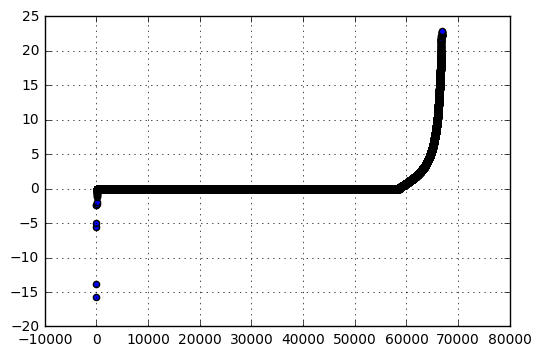

In [19]:
data = avail_amount['avail_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [17]:
avail_amount = avail_amount.join([avail_amount_max,avail_amount_min])
avail_amount.head()

,avail_amount,avail_amount_max,avail_amount_min
userid,,,
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,1.014342,19.662141,19.662141
5,0.000000,0.000000,0.000000
6,2.447743,20.464738,20.464738


In [18]:
avail_amount['avail_amount_sub'] = avail_amount['avail_amount_max']-avail_amount['avail_amount_min']
avail_amount.head()

,avail_amount,avail_amount_max,avail_amount_min,avail_amount_sub
userid,,,,
2,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0
4,1.014342,19.662141,19.662141,0.0
5,0.000000,0.000000,0.000000,0.0
6,2.447743,20.464738,20.464738,0.0


In [19]:
# 预借现金额度  prepare_amount
prepare_amount = bill_data[['userid','prepare_amount']]
prepare_amount = pd.pivot_table(prepare_amount,index=['userid'],values=['prepare_amount'],aggfunc=np.mean)
prepare_amount.head()

,prepare_amount
userid,
2,7.087560
3,0.000000
4,7.808445
5,19.971271
6,13.788434


In [20]:
prepare_amount_max = bill_data[['userid','prepare_amount']]
prepare_amount_max = pd.pivot_table(prepare_amount_max,index=['userid'],values=['prepare_amount'],aggfunc=np.max)
prepare_amount_max.columns = ['prepare_amount_max']
prepare_amount_max.head()

,prepare_amount_max
userid,
2,20.376736
3,0.000000
4,18.767298
5,19.971271
6,20.559057


In [21]:
prepare_amount_min = bill_data[['userid','prepare_amount']]
prepare_amount_min = pd.pivot_table(prepare_amount_min,index=['userid'],values=['prepare_amount'],aggfunc=np.min)
prepare_amount_min.columns = ['prepare_amount_min']
prepare_amount_min.head()

,prepare_amount_min
userid,
2,0.000000
3,0.000000
4,0.000000
5,19.971271
6,0.000000


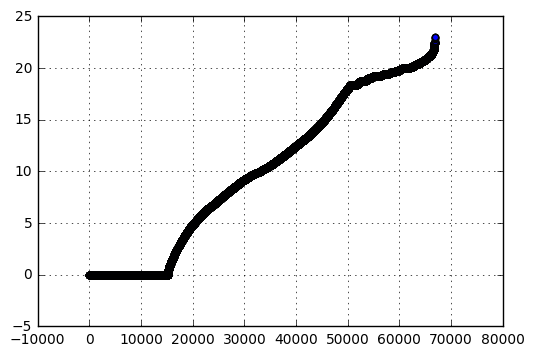

In [22]:
data = prepare_amount['prepare_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [22]:
prepare_amount = prepare_amount.join([prepare_amount_max,prepare_amount_min])
prepare_amount.head()

,prepare_amount,prepare_amount_max,prepare_amount_min
userid,,,
2,7.087560,20.376736,0.000000
3,0.000000,0.000000,0.000000
4,7.808445,18.767298,0.000000
5,19.971271,19.971271,19.971271
6,13.788434,20.559057,0.000000


In [23]:
prepare_amount['prepare_amount_sub'] = prepare_amount['prepare_amount_max']-prepare_amount['prepare_amount_min']
prepare_amount.head()

,prepare_amount,prepare_amount_max,prepare_amount_min,prepare_amount_sub
userid,,,,
2,7.087560,20.376736,0.000000,20.376736
3,0.000000,0.000000,0.000000,0.000000
4,7.808445,18.767298,0.000000,18.767298
5,19.971271,19.971271,19.971271,0.000000
6,13.788434,20.559057,0.000000,20.559057


In [24]:
# 循环利息 circ_interest
circ_interest = bill_data[['userid','circ_interest']]
circ_interest = pd.pivot_table(circ_interest,index=['userid'],values=['circ_interest'],aggfunc=np.mean)
circ_interest.head()

,circ_interest
userid,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [25]:
circ_interest_max = bill_data[['userid','circ_interest']]
circ_interest_max = pd.pivot_table(circ_interest_max,index=['userid'],values=['circ_interest'],aggfunc=np.max)
circ_interest_max.columns = ['circ_interest_max']
circ_interest_max.head()

,circ_interest_max
userid,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [26]:
circ_interest_min = bill_data[['userid','circ_interest']]
circ_interest_min = pd.pivot_table(circ_interest_min,index=['userid'],values=['circ_interest'],aggfunc=np.min)
circ_interest_min.columns = ['circ_interest_min']
circ_interest_min.head()

,circ_interest_min
userid,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


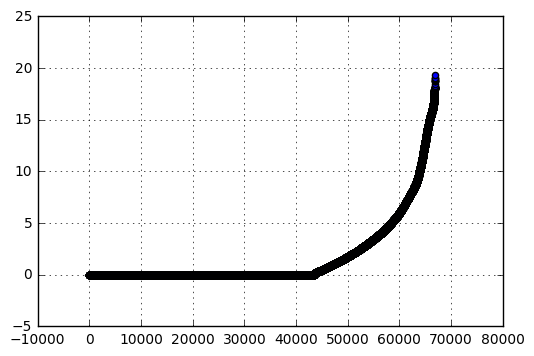

In [25]:
data = circ_interest['circ_interest'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [27]:
circ_interest = circ_interest.join([circ_interest_max,circ_interest_min])
circ_interest.head()

,circ_interest,circ_interest_max,circ_interest_min
userid,,,
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0


In [28]:
circ_interest['circ_interest_sub'] = circ_interest['circ_interest_max']-circ_interest['circ_interest_min']
circ_interest.head()

,circ_interest,circ_interest_max,circ_interest_min,circ_interest_sub
userid,,,,
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0


In [29]:
#  本期余额 amount_of_bill_left
amount_of_bill_left = bill_data[['userid','amount_of_bill_left']]
amount_of_bill_left = pd.pivot_table(amount_of_bill_left,index=['userid'],values=['amount_of_bill_left'],aggfunc=np.mean)
amount_of_bill_left.columns = ['amount_of_bill_left']
amount_of_bill_left.head()

,amount_of_bill_left
userid,
2,19.872065
3,18.348270
4,18.847398
5,20.636046
6,19.176074


In [30]:
amount_of_bill_left_max = bill_data[['userid','amount_of_bill_left']]
amount_of_bill_left_max = pd.pivot_table(amount_of_bill_left_max,index=['userid'],values=['amount_of_bill_left'],aggfunc=np.max)
amount_of_bill_left_max.columns = ['amount_of_bill_left_max']
amount_of_bill_left_max.head()

,amount_of_bill_left_max
userid,
2,21.605425
3,18.371030
4,20.575036
5,20.676582
6,21.198821


In [31]:
amount_of_bill_left_min = bill_data[['userid','amount_of_bill_left']]
amount_of_bill_left_min = pd.pivot_table(amount_of_bill_left_min,index=['userid'],values=['amount_of_bill_left'],aggfunc=np.min)
amount_of_bill_left_min.columns = ['amount_of_bill_left_min']
amount_of_bill_left_min.head()

,amount_of_bill_left_min
userid,
2,16.656269
3,18.325511
4,15.825675
5,20.595510
6,-18.105068


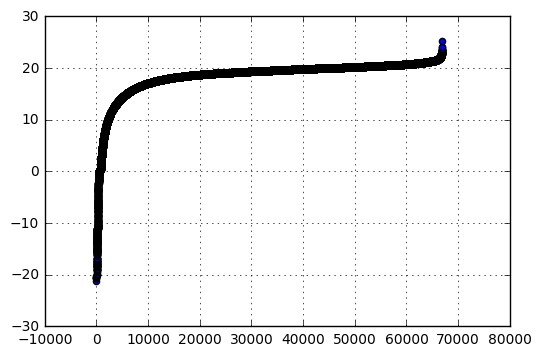

In [52]:
data = amount_of_bill_left['amount_of_bill_left'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [32]:
amount_of_bill_left = amount_of_bill_left.join([amount_of_bill_left_max,amount_of_bill_left_min])
amount_of_bill_left.head()

,amount_of_bill_left,amount_of_bill_left_max,amount_of_bill_left_min
userid,,,
2,19.872065,21.605425,16.656269
3,18.348270,18.371030,18.325511
4,18.847398,20.575036,15.825675
5,20.636046,20.676582,20.595510
6,19.176074,21.198821,-18.105068


In [33]:
amount_of_bill_left['amount_of_bill_left_sub'] = amount_of_bill_left['amount_of_bill_left_max']-amount_of_bill_left['amount_of_bill_left_min']
amount_of_bill_left.head()

,amount_of_bill_left,amount_of_bill_left_max,amount_of_bill_left_min,amount_of_bill_left_sub
userid,,,,
2,19.872065,21.605425,16.656269,4.949156
3,18.348270,18.371030,18.325511,0.045519
4,18.847398,20.575036,15.825675,4.749361
5,20.636046,20.676582,20.595510,0.081072
6,19.176074,21.198821,-18.105068,39.303889


In [34]:
# 上期还款金额 pre_repayment
pre_repayment = bill_data[['userid','pre_repayment']]
pre_repayment = pd.pivot_table(pre_repayment,index=['userid'],values=['pre_repayment'],aggfunc=np.mean)
pre_repayment.columns = ['pre_repayment']
pre_repayment.head()

,pre_repayment
userid,
2,15.277706
3,18.580174
4,4.948698
5,18.539760
6,17.363353


In [35]:
pre_repayment_max = bill_data[['userid','pre_repayment']]
pre_repayment_max = pd.pivot_table(pre_repayment_max,index=['userid'],values=['pre_repayment'],aggfunc=np.max)
pre_repayment_max.columns = ['pre_repayment_max']
pre_repayment_max.head()

,pre_repayment_max
userid,
2,21.693954
3,19.495329
4,19.483836
5,18.560684
6,21.177840


In [36]:
pre_repayment_min = bill_data[['userid','pre_repayment']]
pre_repayment_min = pd.pivot_table(pre_repayment_min,index=['userid'],values=['pre_repayment'],aggfunc=np.min)
pre_repayment_min.columns = ['pre_repayment_min']
pre_repayment_min.head()

,pre_repayment_min
userid,
2,0.000000
3,17.665019
4,0.000000
5,18.518836
6,0.000000


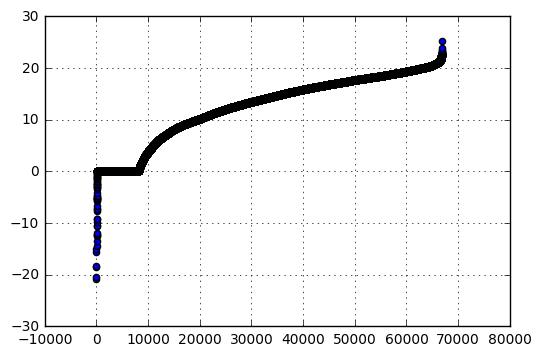

In [60]:
data = pre_repayment['pre_repayment'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [38]:
pre_repayment = pre_repayment.join([pre_repayment_max,pre_repayment_min])
pre_repayment.head()

,pre_repayment,pre_repayment_max,pre_repayment_min
userid,,,
2,15.277706,21.693954,0.000000
3,18.580174,19.495329,17.665019
4,4.948698,19.483836,0.000000
5,18.539760,18.560684,18.518836
6,17.363353,21.177840,0.000000


In [39]:
pre_repayment['pre_repayment_sub'] = pre_repayment['pre_repayment_max']-pre_repayment['pre_repayment_min']
pre_repayment.head()

,pre_repayment,pre_repayment_max,pre_repayment_min,pre_repayment_sub
userid,,,,
2,15.277706,21.693954,0.000000,21.693954
3,18.580174,19.495329,17.665019,1.830310
4,4.948698,19.483836,0.000000,19.483836
5,18.539760,18.560684,18.518836,0.041848
6,17.363353,21.177840,0.000000,21.177840


In [40]:
# 本期账单金额 amount_of_bill
amount_of_bill = bill_data[['userid','amount_of_bill']]
amount_of_bill = pd.pivot_table(amount_of_bill,index=['userid'],values=['amount_of_bill'],aggfunc=np.mean)
amount_of_bill.columns = ['amount_of_bill']
amount_of_bill.head()

,amount_of_bill
userid,
2,15.319652
3,18.581412
4,7.313613
5,17.957256
6,12.452313


In [41]:
amount_of_bill_max = bill_data[['userid','amount_of_bill']]
amount_of_bill_max = pd.pivot_table(amount_of_bill_max,index=['userid'],values=['amount_of_bill'],aggfunc=np.max)
amount_of_bill_max.columns = ['amount_of_bill_max']
amount_of_bill_max.head()

,amount_of_bill_max
userid,
2,21.680054
3,19.480767
4,19.553419
5,18.515695
6,20.850423


In [42]:
amount_of_bill_min = bill_data[['userid','amount_of_bill']]
amount_of_bill_min = pd.pivot_table(amount_of_bill_min,index=['userid'],values=['amount_of_bill'],aggfunc=np.min)
amount_of_bill_min.columns = ['amount_of_bill_min']
amount_of_bill_min.head()

,amount_of_bill_min
userid,
2,0.000000
3,17.682056
4,0.000000
5,17.398817
6,0.000000


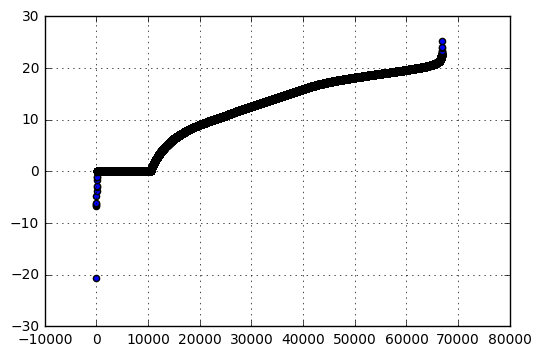

In [65]:
data = amount_of_bill['amount_of_bill'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [43]:
amount_of_bill = amount_of_bill.join([amount_of_bill_max,amount_of_bill_min])
amount_of_bill.head()

,amount_of_bill,amount_of_bill_max,amount_of_bill_min
userid,,,
2,15.319652,21.680054,0.000000
3,18.581412,19.480767,17.682056
4,7.313613,19.553419,0.000000
5,17.957256,18.515695,17.398817
6,12.452313,20.850423,0.000000


In [44]:
amount_of_bill['amount_of_bill_sub'] = amount_of_bill['amount_of_bill_max']-amount_of_bill['amount_of_bill_min']
amount_of_bill.head()

,amount_of_bill,amount_of_bill_max,amount_of_bill_min,amount_of_bill_sub
userid,,,,
2,15.319652,21.680054,0.000000,21.680054
3,18.581412,19.480767,17.682056,1.798711
4,7.313613,19.553419,0.000000,19.553419
5,17.957256,18.515695,17.398817,1.116878
6,12.452313,20.850423,0.000000,20.850423


In [45]:
# 本期调整金额 adjust_amount
adjust_amount = bill_data[['userid','adjust_amount']]
adjust_amount = pd.pivot_table(adjust_amount,index=['userid'],values=['adjust_amount'],aggfunc=np.mean)
adjust_amount.columns = ['adjust_amount']
adjust_amount.head()

,adjust_amount
userid,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [46]:
adjust_amount_max = bill_data[['userid','adjust_amount']]
adjust_amount_max = pd.pivot_table(adjust_amount_max,index=['userid'],values=['adjust_amount'],aggfunc=np.max)
adjust_amount_max.columns = ['adjust_amount_max']
adjust_amount_max.head()

,adjust_amount_max
userid,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [47]:
adjust_amount_min = bill_data[['userid','adjust_amount']]
adjust_amount_min = pd.pivot_table(adjust_amount_min,index=['userid'],values=['adjust_amount'],aggfunc=np.min)
adjust_amount_min.columns = ['adjust_amount_min']
adjust_amount_min.head()

,adjust_amount_min
userid,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


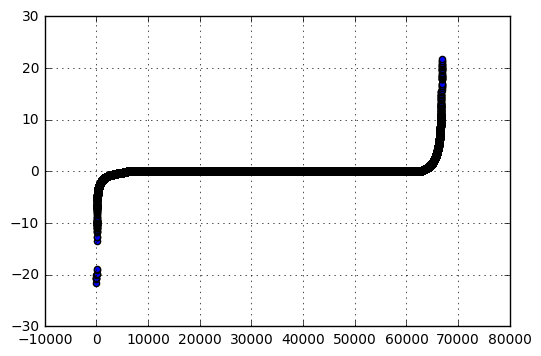

In [71]:
data = adjust_amount['adjust_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [48]:
adjust_amount = adjust_amount.join([adjust_amount_max,adjust_amount_min])
adjust_amount.head()

,adjust_amount,adjust_amount_max,adjust_amount_min
userid,,,
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0


In [49]:
adjust_amount['adjust_amount_sub'] = adjust_amount['adjust_amount_max']-adjust_amount['adjust_amount_min']
adjust_amount.head()

,adjust_amount,adjust_amount_max,adjust_amount_min,adjust_amount_sub
userid,,,,
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0


In [50]:
# 本期账单最低还款额 least_repayment
least_repayment = bill_data[['userid','least_repayment']]
least_repayment = pd.pivot_table(least_repayment,index=['userid'],values=['least_repayment'],aggfunc=np.mean)
least_repayment.columns = ['least_repayment']
least_repayment.head()

,least_repayment
userid,
2,13.109063
3,16.045651
4,17.456999
5,18.474369
6,17.976737


In [51]:
least_repayment_max = bill_data[['userid','least_repayment']]
least_repayment_max = pd.pivot_table(least_repayment_max,index=['userid'],values=['least_repayment'],aggfunc=np.max)
least_repayment_max.columns = ['least_repayment_max']
least_repayment_max.head()

,least_repayment_max
userid,
2,19.166874
3,16.068406
4,19.222057
5,18.513394
6,20.190157


In [52]:
least_repayment_min = bill_data[['userid','least_repayment']]
least_repayment_min = pd.pivot_table(least_repayment_min,index=['userid'],values=['least_repayment'],aggfunc=np.min)
least_repayment_min.columns = ['least_repayment_min']
least_repayment_min.head()

,least_repayment_min
userid,
2,-17.787357
3,16.022895
4,15.825675
5,18.435343
6,0.000000


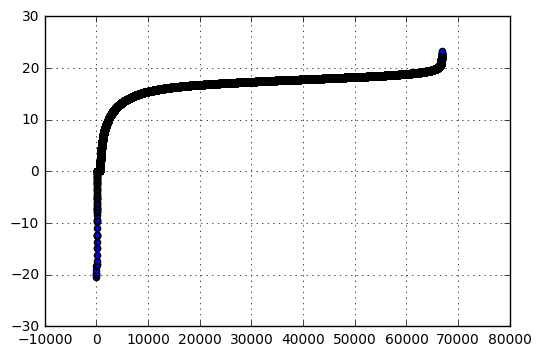

In [78]:
data = least_repayment['least_repayment'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [53]:
least_repayment = least_repayment.join([least_repayment_max,least_repayment_min])
least_repayment.head()

,least_repayment,least_repayment_max,least_repayment_min
userid,,,
2,13.109063,19.166874,-17.787357
3,16.045651,16.068406,16.022895
4,17.456999,19.222057,15.825675
5,18.474369,18.513394,18.435343
6,17.976737,20.190157,0.000000


In [54]:
least_repayment['least_repayment_sub'] = least_repayment['least_repayment_max']-least_repayment['least_repayment_min']
least_repayment.head()

,least_repayment,least_repayment_max,least_repayment_min,least_repayment_sub
userid,,,,
2,13.109063,19.166874,-17.787357,36.954231
3,16.045651,16.068406,16.022895,0.045511
4,17.456999,19.222057,15.825675,3.396382
5,18.474369,18.513394,18.435343,0.078051
6,17.976737,20.190157,0.000000,20.190157


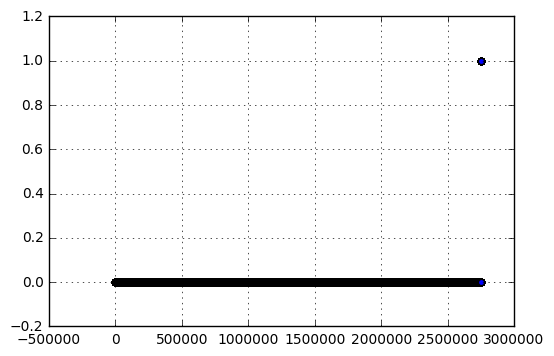

In [55]:
# 还款状态 repayment_state
repayment_state = bill_data[['userid','repayment_state']]
data = repayment_state['repayment_state'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

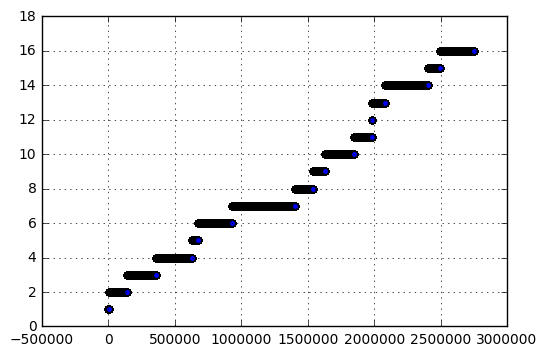

In [58]:
# 银行id bank_id
bank_id = bill_data[['userid','bank_id']]
data  = bank_id[bank_id['bank_id']<1000]['bank_id']
data = data.sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [59]:
bank_ids = bank_id.copy()
def getD(x):
    if x>20: return 0
    return x
bank_ids['bank_id'] = bank_ids['bank_id'].apply(lambda x:getD(x))

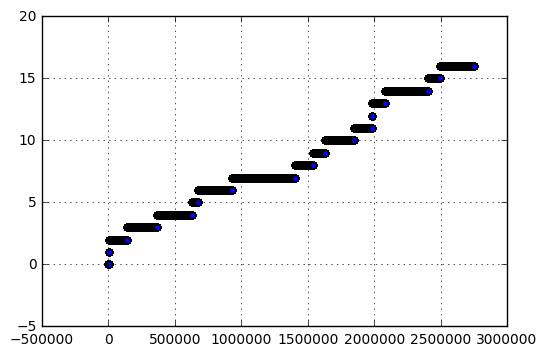

In [108]:
data  = bank_ids['bank_id']
data = data.sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [60]:
bank_ids['bank_count'] = np.ones(len(bank_ids))
bank_ids = pd.pivot_table(bank_ids,index=['userid','bank_id'],values=['bank_count'])
bank_ids.head()

bank_count
userid bank_id            
2      4               1.0
       9               1.0
       16              1.0
3      2               1.0
4      3               1.0

In [110]:
bank_ids = bank_ids.unstack()
bank_ids.columns = ["bank_id#{}".format(i) for i in range(0,17)]
bank_ids.fillna(0)
bank_ids.head()

,bank_id#0,bank_id#1,bank_id#2,bank_id#3,bank_id#4,bank_id#5,bank_id#6,bank_id#7,bank_id#8,bank_id#9,bank_id#10,bank_id#11,bank_id#12,bank_id#13,bank_id#14,bank_id#15,bank_id#16
userid,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
for col in bank_ids.columns:
    bank_ids[col].astype(float)
bank_ids = bank_ids.fillna(0)
bank_ids.head()

,bank_id#0,bank_id#1,bank_id#2,bank_id#3,bank_id#4,bank_id#5,bank_id#6,bank_id#7,bank_id#8,bank_id#9,bank_id#10,bank_id#11,bank_id#12,bank_id#13,bank_id#14,bank_id#15,bank_id#16
userid,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
bank_ids['bank_count'] = np.sum(bank_ids,axis=1)
bank_ids.head()

,bank_id#0,bank_id#1,bank_id#2,bank_id#3,bank_id#4,bank_id#5,bank_id#6,bank_id#7,bank_id#8,bank_id#9,bank_id#10,bank_id#11,bank_id#12,bank_id#13,bank_id#14,bank_id#15,bank_id#16,bank_count
userid,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


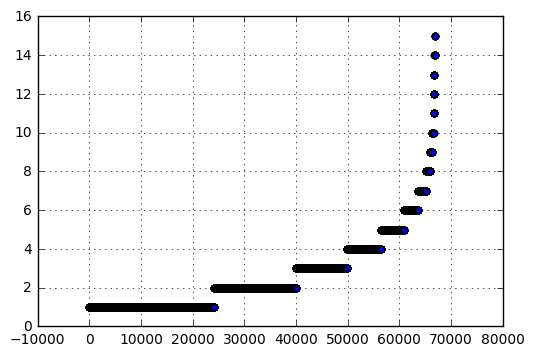

In [161]:
data = bank_ids['bank_count'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [63]:
# 循环利息 circ_interest,预借现金额度 prepare_amount,可用金额 avail_amount,消费笔数 consumeN
# 信用卡额度 credit_amount,本期账单余额 amount_of_bill_left,上期还款金额 pre_repayment
# 本期账单金额 amount_of_bill,本期调整金额 adjust_amount,本期账单最低还款额 least_repayment
# 还款状态 repayment_state,# 银行id bank_id 暂时去除 # 每张卡的消费笔数的最大的一张的平均值
datas = circ_interest.join([prepare_amount,avail_amount,consumeN,credit_amount,amount_of_bill_left,
                           pre_repayment,amount_of_bill,least_repayment,consume_amount_bank_max,
                           credit_amount_bank_max,credit_amount_bank_min])
datas.head()

,circ_interest,circ_interest_max,circ_interest_min,circ_interest_sub,prepare_amount,prepare_amount_max,prepare_amount_min,prepare_amount_sub,avail_amount,avail_amount_max,...,pre_repayment_min,pre_repayment_sub,amount_of_bill,amount_of_bill_max,amount_of_bill_min,amount_of_bill_sub,least_repayment,least_repayment_max,least_repayment_min,least_repayment_sub
userid,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,7.087560,20.376736,0.000000,20.376736,0.000000,0.000000,...,0.000000,21.693954,15.319652,21.680054,0.000000,21.680054,13.109063,19.166874,-17.787357,36.954231
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.665019,1.830310,18.581412,19.480767,17.682056,1.798711,16.045651,16.068406,16.022895,0.045511
4,0.0,0.0,0.0,0.0,7.808445,18.767298,0.000000,18.767298,1.014342,19.662141,...,0.000000,19.483836,7.313613,19.553419,0.000000,19.553419,17.456999,19.222057,15.825675,3.396382
5,0.0,0.0,0.0,0.0,19.971271,19.971271,19.971271,0.000000,0.000000,0.000000,...,18.518836,0.041848,17.957256,18.515695,17.398817,1.116878,18.474369,18.513394,18.435343,0.078051
6,0.0,0.0,0.0,0.0,13.788434,20.559057,0.000000,20.559057,2.447743,20.464738,...,0.000000,21.177840,12.452313,20.850423,0.000000,20.850423,17.976737,20.190157,0.000000,20.190157


In [64]:
#  添加 bill  数据 tage
datas['bill_tag'] = 1
datas.head()

,circ_interest,circ_interest_max,circ_interest_min,circ_interest_sub,prepare_amount,prepare_amount_max,prepare_amount_min,prepare_amount_sub,avail_amount,avail_amount_max,...,pre_repayment_sub,amount_of_bill,amount_of_bill_max,amount_of_bill_min,amount_of_bill_sub,least_repayment,least_repayment_max,least_repayment_min,least_repayment_sub,bill_tag
userid,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,7.087560,20.376736,0.000000,20.376736,0.000000,0.000000,...,21.693954,15.319652,21.680054,0.000000,21.680054,13.109063,19.166874,-17.787357,36.954231,1
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.830310,18.581412,19.480767,17.682056,1.798711,16.045651,16.068406,16.022895,0.045511,1
4,0.0,0.0,0.0,0.0,7.808445,18.767298,0.000000,18.767298,1.014342,19.662141,...,19.483836,7.313613,19.553419,0.000000,19.553419,17.456999,19.222057,15.825675,3.396382,1
5,0.0,0.0,0.0,0.0,19.971271,19.971271,19.971271,0.000000,0.000000,0.000000,...,0.041848,17.957256,18.515695,17.398817,1.116878,18.474369,18.513394,18.435343,0.078051,1
6,0.0,0.0,0.0,0.0,13.788434,20.559057,0.000000,20.559057,2.447743,20.464738,...,21.177840,12.452313,20.850423,0.000000,20.850423,17.976737,20.190157,0.000000,20.190157,1


In [65]:
datas.to_csv("../data/train/bill_detail.csv")